In [1]:
# Make sure working directory is at project level
import os
if os.path.basename(os.getcwd()) == 'sandbox':
    os.chdir('..')

In [2]:
# Import Libraries
%matplotlib inline


import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm


from warnings import filterwarnings
filterwarnings('ignore')

# For easy display of floating numbers
pd.set_option('display.float_format', lambda x: '%.4f' % x)

## Approach
### First Step before we build a model is Data Preparation. This will involve a) Data Exploration , visualization, and Understanding the data ( Categorical vs. Numeric  etc.) b) Cleaning the data and dealing with outliers and missing values , and c) Scaling the data 
### We do not expect missing values as we have imputed (forward and backward filled data) while extracting Features for respective Cities
### Scaling helps in model convergence and avoiding bias (one feature more important than other due to scale). I am planning to use models (Linear regression, Decision Tree , Random Forest, and  Negative Binomial Distribution) - which does not require scaling 
### We should as well find correlation  among predictors - if predictors are highly correlated - we may think of reducing / combining feature space. We will use PCA (which will require Scaling) to reduce highly correlated features ( to avoid multicollinearity)
### We will Analyze and model SanJuan and Iquitos data separately - as climatic condition and feature are quite different across Cities

# Data Preparation

In [3]:
dfSanJuan = pd.read_csv("output/dfSanJuan.csv")
print(dfSanJuan.shape)
display(dfSanJuan.head())

dfIquitos = pd.read_csv("output/dfIquitos.csv")
print(dfIquitos.shape)
display(dfIquitos.head())


(988, 25)


,city,year,weekOfYear,week_start_date,total_cases,station_max_temp_c,station_avg_temp_c,station_precip_mm,station_min_temp_c,station_diur_temp_rng_c,...,reanalysis_specific_humidity_g_per_kg,reanalysis_precip_amt_kg_per_m2,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_avg_temp_k,reanalysis_tdtr_k,ndvi_location_1,ndvi_location_2,ndvi_location_3,ndvi_location_4
0,sj,1990,18,1990-04-30,4,28.8900,25.4400,1.7700,21.9900,6.9000,...,14.0129,4.5714,299.0571,296.4286,297.7429,2.6286,0.1985,0.1226,0.1776,0.1037
1,sj,1990,19,1990-05-07,5,29.9100,26.7100,3.2600,23.5400,6.3700,...,15.3729,2.5629,299.6286,297.2571,298.4429,2.3714,0.1624,0.1699,0.1555,0.1422
2,sj,1990,20,1990-05-14,4,29.9700,26.7100,4.9300,23.4900,6.4900,...,16.8486,3.7286,300.0286,297.7286,298.8786,2.3000,0.1572,0.0323,0.1708,0.1730
3,sj,1990,21,1990-05-21,3,30.8700,27.4700,2.1900,24.1000,6.7700,...,16.6729,1.9857,300.4429,298.0143,299.2286,2.4286,0.2276,0.1286,0.2359,0.2451
4,sj,1990,22,1990-05-28,6,33.6400,28.9400,1.0700,24.2700,9.3700,...,17.2100,1.7429,301.1714,298.1571,299.6643,3.0143,0.2512,0.1962,0.2473,0.2622


(468, 25)


,city,year,weekOfYear,week_start_date,total_cases,station_max_temp_c,station_avg_temp_c,station_precip_mm,station_min_temp_c,station_diur_temp_rng_c,...,reanalysis_specific_humidity_g_per_kg,reanalysis_precip_amt_kg_per_m2,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_avg_temp_k,reanalysis_tdtr_k,ndvi_location_1,ndvi_location_2,ndvi_location_3,ndvi_location_4
0,iq,2000,26,2000-07-01,0,31.6000,26.3400,3.6300,21.0300,10.5100,...,16.6514,6.1700,302.9143,293.9857,298.4500,8.9286,0.1929,0.2472,0.1323,0.3409
1,iq,2000,27,2000-07-08,0,33.0700,26.9100,8.6600,20.9000,11.9100,...,16.8629,6.5714,303.5857,293.2714,298.4286,10.3143,0.2168,0.2417,0.2761,0.2895
2,iq,2000,28,2000-07-15,0,31.0000,26.7400,7.9300,20.9700,11.4400,...,17.1200,9.2529,301.0857,293.7000,297.3929,7.3857,0.1768,0.1280,0.1731,0.2041
3,iq,2000,29,2000-07-22,0,27.5800,25.0200,0.8000,18.2300,12.5500,...,14.4314,3.4229,300.7857,291.6714,296.2286,9.1143,0.2277,0.2003,0.1454,0.2542
4,iq,2000,30,2000-07-29,0,31.6100,25.9700,8.9700,20.3400,11.2700,...,15.4443,4.5429,302.3857,292.8857,297.6357,9.5000,0.3286,0.3610,0.3221,0.2544


In [4]:
print("SanJuan")
print(dfSanJuan.info())
print(dfSanJuan.isna().sum())
print("-----------------------------------------------------------------------------------------------------------------------------------------------")
print("Iquitos")
print(dfIquitos.info())
print(dfIquitos.isna().sum())


SanJuan
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 25 columns):
city                                     988 non-null object
year                                     988 non-null int64
weekOfYear                               988 non-null int64
week_start_date                          988 non-null object
total_cases                              988 non-null int64
station_max_temp_c                       988 non-null float64
station_avg_temp_c                       988 non-null float64
station_precip_mm                        988 non-null float64
station_min_temp_c                       988 non-null float64
station_diur_temp_rng_c                  988 non-null float64
precipitation_amt_mm                     988 non-null float64
reanalysis_sat_precip_amt_mm             988 non-null float64
reanalysis_dew_point_temp_k              988 non-null float64
reanalysis_air_temp_k                    988 non-null float64
reanalysis_relative_humidit

In [5]:
print(dfSanJuan.describe())

           year  weekOfYear  total_cases  station_max_temp_c  \
count  988.0000    988.0000     988.0000            988.0000   
mean  1999.3269     26.5000      33.4291             30.3619   
std      5.5001     15.0159      50.2140              1.5382   
min   1990.0000      1.0000       0.0000             25.9600   
25%   1995.0000     13.7500       9.0000             29.1300   
50%   1999.0000     26.5000      19.0000             30.6350   
75%   2004.0000     39.2500      37.0000             31.6000   
max   2009.0000     52.0000     461.0000             33.8600   

       station_avg_temp_c  station_precip_mm  station_min_temp_c  \
count            988.0000           988.0000            988.0000   
mean              26.9989             4.9453             23.6362   
std                1.4145             6.2911              1.4007   
min               22.8400             0.0000             19.4400   
25%               25.8100             0.0000             22.5300   
50%            

In [6]:
print(dfIquitos.describe())

           year  weekOfYear  total_cases  station_max_temp_c  \
count  468.0000    468.0000     468.0000            468.0000   
mean  2004.5000     26.4444       7.7735             32.4657   
std      2.6328     14.9779      11.2099              1.3884   
min   2000.0000      1.0000       0.0000             25.5400   
25%   2002.0000     13.7500       1.0000             31.6400   
50%   2004.5000     26.0000       5.0000             32.6300   
75%   2007.0000     39.0000       9.0000             33.3225   
max   2009.0000     52.0000     116.0000             36.7100   

       station_avg_temp_c  station_precip_mm  station_min_temp_c  \
count            468.0000           468.0000            468.0000   
mean              27.3804             9.2908             22.0710   
std                0.9056             5.1097              0.8968   
min               22.3200             0.0000             18.2300   
25%               26.8600             5.7200             21.4700   
50%            

### Data Visualization

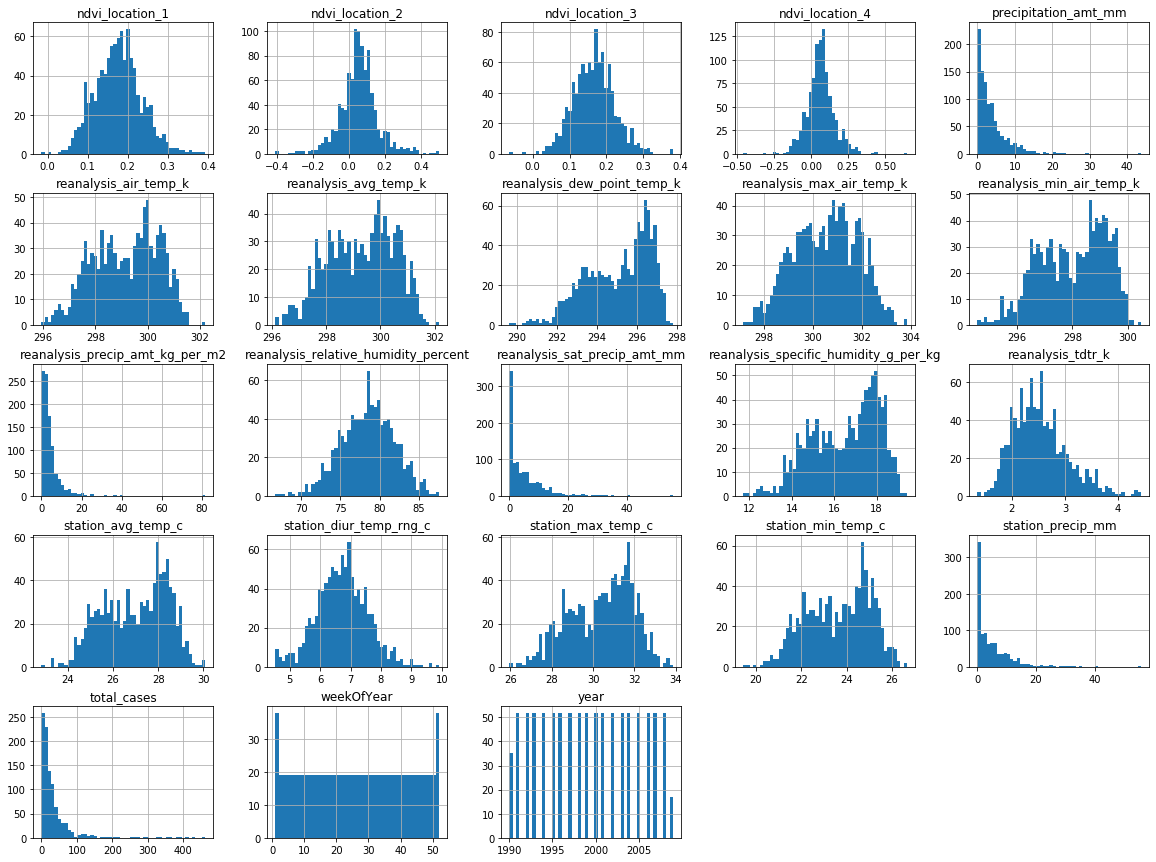

In [7]:
# Observing if there is any Outlier
%matplotlib inline  
import matplotlib.pyplot as plt
dfSanJuan.hist(bins=50, figsize=(20,15))
plt.savefig("plots/SanJuanHistoGram.png")
plt.show()



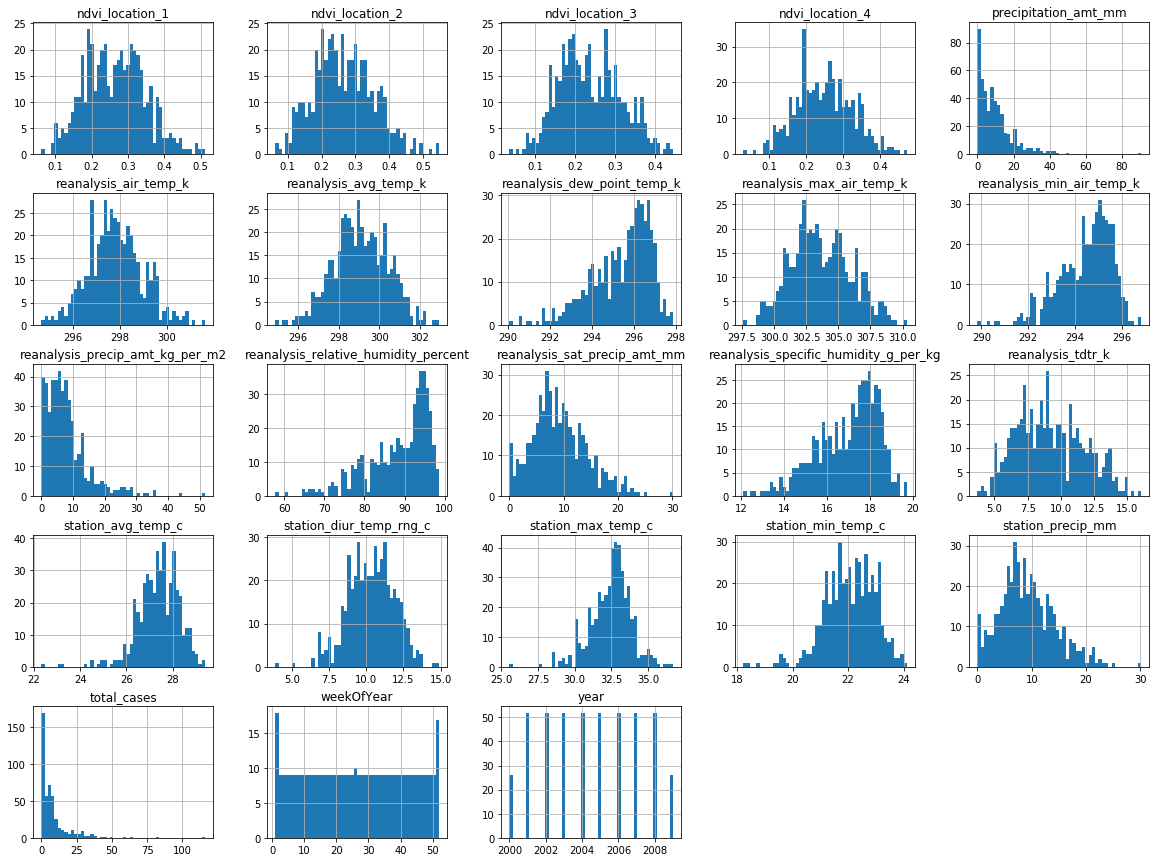

In [8]:
# Observing if there is any Outlier
%matplotlib inline  
import matplotlib.pyplot as plt
dfIquitos.hist(bins=50, figsize=(20,15))
plt.savefig("plots/IquitosHistoGram.png")
plt.show()

### Data Correlation 

In [9]:
# San Jones
corr_matrix = dfSanJuan.corr()
corr_matrix['total_cases'].sort_values(ascending=False)

total_cases                              1.0000
weekOfYear                               0.2790
reanalysis_specific_humidity_g_per_kg    0.1910
reanalysis_dew_point_temp_k              0.1871
station_avg_temp_c                       0.1761
reanalysis_min_air_temp_k                0.1757
station_max_temp_c                       0.1732
station_min_temp_c                       0.1639
reanalysis_air_temp_k                    0.1620
reanalysis_avg_temp_k                    0.1558
reanalysis_relative_humidity_percent     0.1429
reanalysis_max_air_temp_k                0.1313
reanalysis_precip_amt_kg_per_m2          0.1107
reanalysis_sat_precip_amt_mm             0.0576
station_precip_mm                        0.0576
ndvi_location_4                          0.0530
ndvi_location_3                          0.0503
precipitation_amt_mm                     0.0487
station_diur_temp_rng_c                  0.0440
ndvi_location_2                          0.0060
reanalysis_tdtr_k                       

In [10]:
#Iquitos
corr_matrix = dfIquitos.corr()
corr_matrix['total_cases'].sort_values(ascending=False)

total_cases                              1.0000
reanalysis_specific_humidity_g_per_kg    0.2517
reanalysis_dew_point_temp_k              0.2443
reanalysis_min_air_temp_k                0.2433
year                                     0.2422
station_min_temp_c                       0.1795
reanalysis_relative_humidity_percent     0.1392
station_avg_temp_c                       0.1197
station_max_temp_c                       0.1154
reanalysis_air_temp_k                    0.0950
reanalysis_precip_amt_kg_per_m2          0.0917
reanalysis_sat_precip_amt_mm             0.0888
station_precip_mm                        0.0888
reanalysis_avg_temp_k                    0.0739
precipitation_amt_mm                     0.0511
ndvi_location_2                          0.0366
weekOfYear                               0.0222
ndvi_location_1                          0.0213
ndvi_location_3                          0.0006
station_diur_temp_rng_c                 -0.0118
reanalysis_max_air_temp_k               

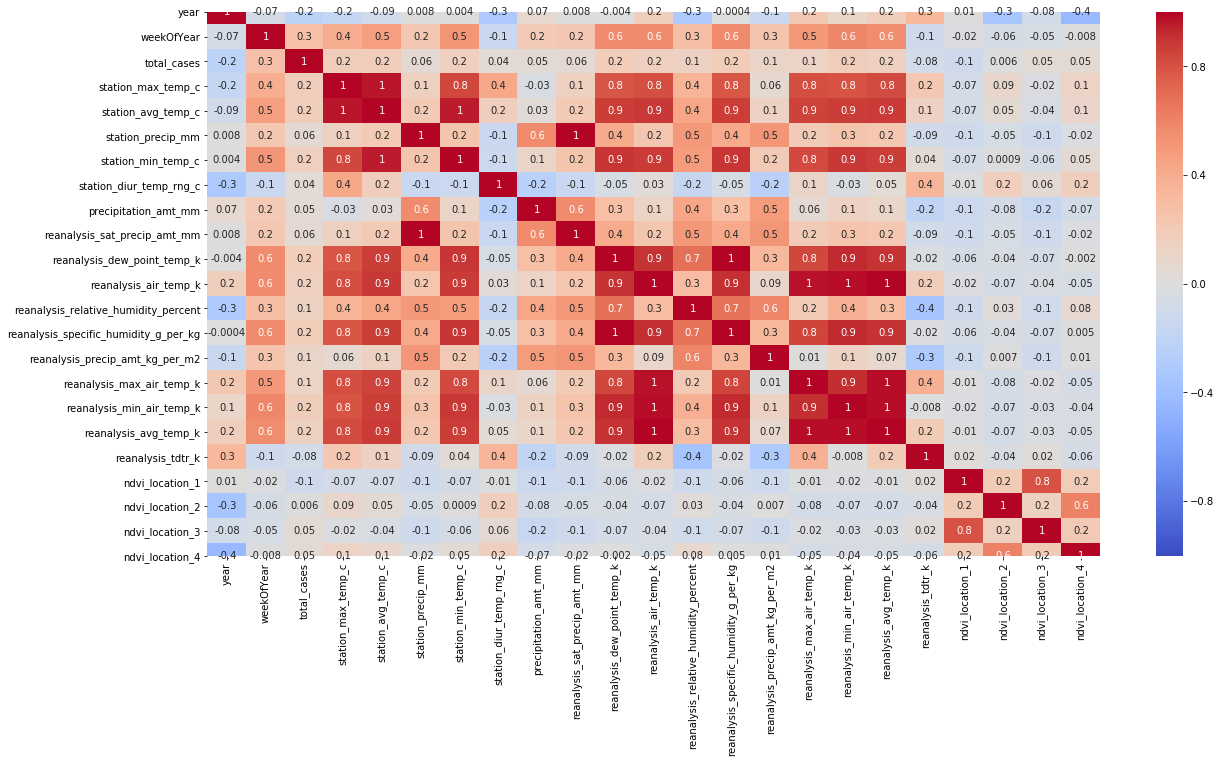

In [11]:
# San Jones
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(dfSanJuan.corr(), annot = True, fmt= '0.1g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',ax=ax)

plt.savefig("plots/SanJuanHeatMap.png")

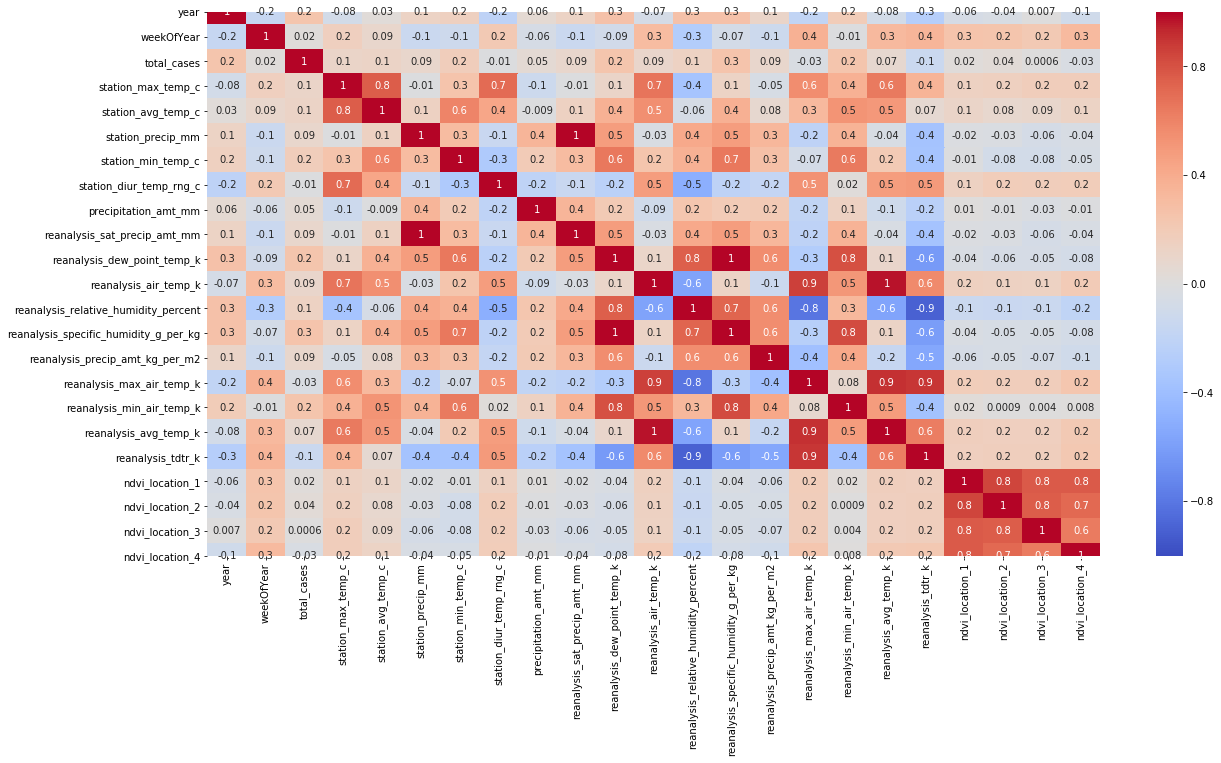

In [12]:
# Iquitos
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(dfIquitos.corr(), annot = True, fmt= '0.1g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',ax=ax)

plt.savefig("plots/IquitosHeatMap.png")

### Many of the temperature data are strongly correlated, which is expected. But the `total_cases` variable doesn't have many obvious strong correlations.

Interestingly, `total_cases` seems to only have weak correlations with other variables. Many of the climate variables are much more strongly correlated. Interestingly, the vegetation index also only has weak correlation with other variables. 

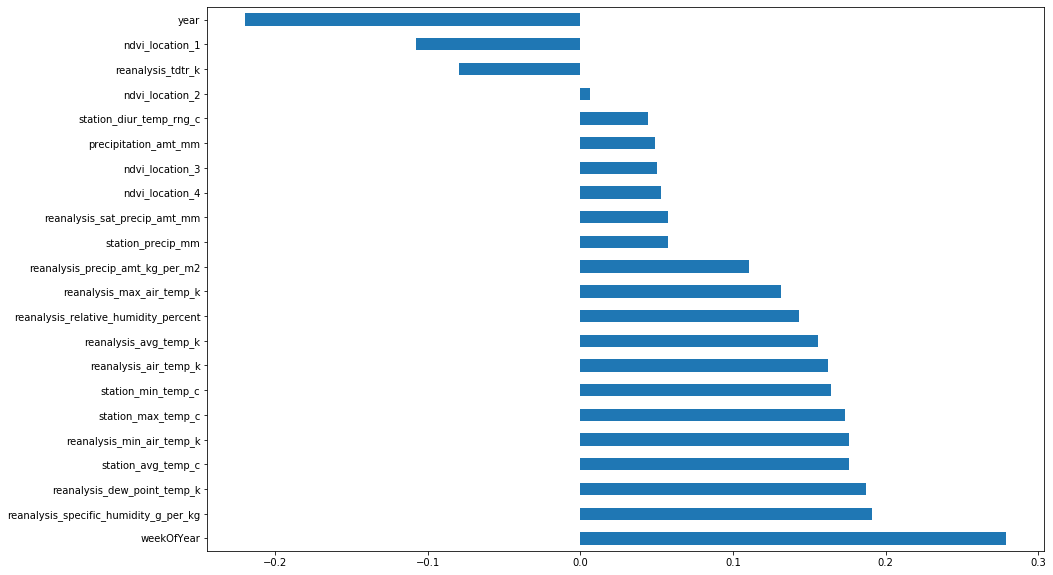

In [13]:
# San Juan
fig, ax = plt.subplots(figsize=(15,10))
(dfSanJuan.corr()
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())
plt.savefig("plots/SanJuanCorr.png")

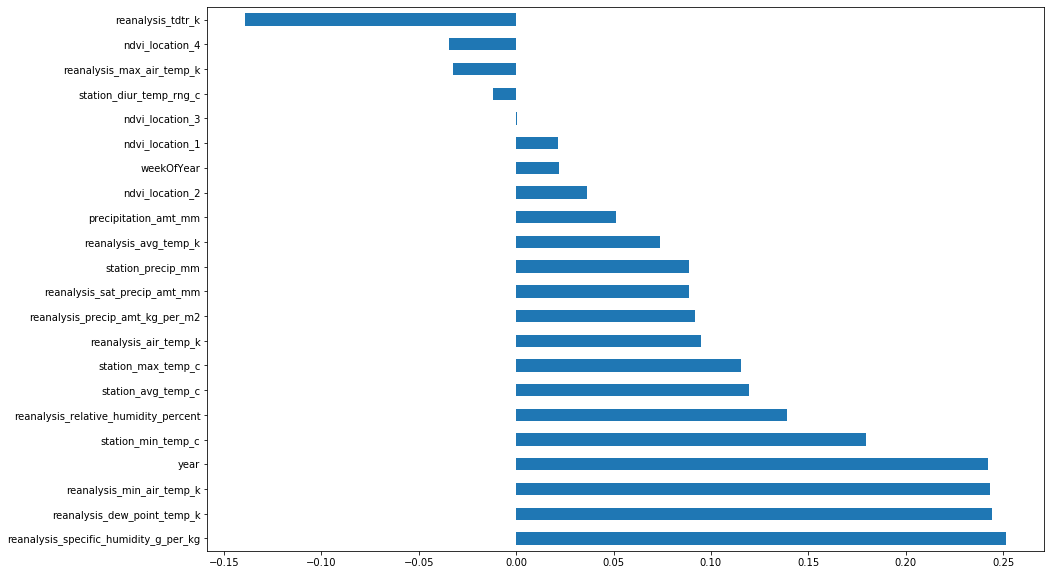

In [14]:
# Iquitos
fig, ax = plt.subplots(figsize=(15,10))
(dfIquitos.corr()
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())
plt.savefig("plots/IquitosCorr.png")

### A few observations

#### The wetter the better
* The correlation strengths differ for each city, but it looks like `reanalysis_specific_humidity_g_per_kg` and `reanalysis_dew_point_temp_k` are the most strongly correlated with `total_cases`. This makes sense: we know mosquitos thrive _wet_ climates, the wetter the better!

#### Hot and heavy
* As minimum temperatures, maximum temperatures, and average temperatures rise, the `total_cases` of dengue fever tend to rise as well.

#### Sometimes it rains, so what
* Interestingly, the `precipitation` measurements bear little to no correlation to `total_cases`, despite strong correlations to the `humidity` measurements, as evident by the heatmaps above.

### Manually extracted features 

Precisely _none_ of these correlations are very strong. Also, there could be potentially **non-linear** relations, but out-of-the-box correlation measures linear dependence.

Based on above, we will  and reduce our inputs to a specific model

#### A few good variables

* `reanalysis_specific_humidity_g_per_kg`
* `reanalysis_dew_point_temp_k`
* `station_avg_temp_c`
* `station_min_temp_c`

# Select and Train Models - Common Methods and Data

* Once we have Cleaned the data - we are ready to run the model
* This is a regression model - based on Climate Data Varaiables - we are predicting  total cases of Dengue
* For regression models - we will choose among Linear Regression , Decision Tree and Random Forest. 
* As there are correlation among features, we will use PCA to find an optimal model
* Further, we will try to levergae Poission or Negative Regression model - in our pursuit of finding an optimal model
* For Model performance, we will leverage mean absolute error (MAE) or Root Mean Square Error (RMSE), As RMSE is impacted by outlier, MAE becomes a good choice. However, as we have not observed any of outliers - we should be fine with any of performance measures
* As we have to choose among models - we will split the data in training (80 % of data) and test ( 20 % of data). We will choose the model - which has the best performance measure
* Based on performance measures (MAE and RMSE) , we will choose the best model

In [15]:
## Method to split data set and return train and test data slices for model performance
from sklearn.model_selection import train_test_split
def getTrainandTestDataSets(dfData, features, labels,test_size,random_state):
    
    splitPoint = int(dfData.shape[0]*0.8)
    print(splitPoint)
    dfData = dfData.sort_values(by=['city', 'year', 'weekOfYear']).reset_index(drop=True)
    #train_set, test_set = train_test_split(dfData, test_size=test_size, random_state=random_state)
    train_set, test_set = dfData.head(splitPoint),dfData.tail(dfData.shape[0]-splitPoint)
    train_set.reset_index(drop=True,inplace=True)
    test_set.reset_index(drop=True,inplace=True)
    
    X_train = train_set[features].set_index(['city', 'year', 'weekOfYear']).sort_index()
    X_test = train_set[labels].set_index(['city', 'year', 'weekOfYear']).sort_index()
    Y_train = test_set[features].set_index(['city', 'year', 'weekOfYear']).sort_index()
    Y_test = test_set[labels].set_index(['city', 'year', 'weekOfYear']).sort_index()
    
    print(X_train.shape, X_test.shape,Y_train.shape, Y_test.shape )
    
        
    return X_train, X_test, Y_train, Y_test
    
    
    

In [16]:
## Method - For a given metrics (say MSE or RMSE) - It will display scores
def display_scores(scores,metric):
    print(metric + " - " + "Scores:", scores)
    print(metric + " - " + "Mean:", scores.mean())
    print(metric + " - " + "Standard deviation:", scores.std())

#### Cross Val Score uses a Utlity function and hence negative mean squared error metrics is used (It is opposite of cost function mean squared error)

In [17]:
## Method - It displays Cross Val Score. It also collects values of Metrics plotting
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def getMSEScoresWithCV(model,modelName,Y_test,Y_pred,cv):
    print("-----------------------------------------------" + modelName + "-----------------------------------------------"  )
    metricsList = []
    scores = cross_val_score(model, Y_test, Y_pred,scoring="neg_mean_squared_error", cv=cv)
    display_scores(scores,"Neg MSE")
    metricsList.append([modelName,'MSE', -scores.mean(),scores.std()])
    print("-----------------------------------------------" + "-" + "-----------------------------------------------"  )
    
    rmse_scores = np.sqrt(-scores)
    display_scores(rmse_scores,"RMSE")
    metricsList.append([modelName,'RMSE', rmse_scores.mean(),rmse_scores.std()])
    return metricsList


In [18]:
def plotPredictedVsActual(Y_pred,Y_test, modelName,cityName):
    figs, axes = plt.subplots(figsize=(20,10))

    ypred = pd.DataFrame(Y_pred,columns=['fittedvalues'])
    ypred.fittedvalues.plot(ax=axes, label="Predictions")
    Y_test.total_cases.plot(ax=axes, label="Actual")
    
    

    plt.suptitle("Dengue Predicted Cases vs. Actual Cases" + " - " + modelName)
    plt.legend()
    
    plt.savefig("plots/"+modelName + "_"+ cityName +".png")
    

In [19]:
# Metod - actually do modelling , display and collect performance metrics
def performModelling(model,modelName,dfData, features, labels,test_size,random_state,cv,cityName):
    X_train,X_test,Y_train,Y_test = getTrainandTestDataSets(dfData, features, labels,test_size,random_state)
    model.fit(X_train, X_test)
    Y_pred = model.predict(Y_train).astype(int)
    metricsList = getMSEScoresWithCV(model,modelName,Y_test,Y_pred,cv)
    plotPredictedVsActual(Y_pred,Y_test,modelName,cityName)
    df =pd.DataFrame(metricsList)
    return df
    
    

In [20]:
from sklearn.model_selection import GridSearchCV
def getRandomForestBestParameters(modelName,dfData, features, labels,test_size,random_state):
    X_train,X_test,Y_train,Y_test = getTrainandTestDataSets(dfData, features, labels,test_size,random_state)
    param_grid = [  {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},  ]

    forest_reg = RandomForestRegressor()

    grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

    grid_search.fit(X_train, X_test)
    
    print("Best Parameters for Random Forest are --> {}".format(grid_search.best_params_))
    attributes = Y_train.columns.tolist()
    
    feature_importances = grid_search.best_estimator_.feature_importances_
    print( "****************************" + "feature_importances"+ "****************************")
    featureList = sorted(zip(feature_importances, attributes), reverse=True)
    print(featureList)
    maxFeature = int(grid_search.best_params_['max_features'])
    
    
    bestFeatures = [str(featureList[i][1]) for i in range(maxFeature)]
    print("As Per Random Forest, Best Features are --> {}".format(bestFeatures))
    indexList = ['city', 'year', 'weekOfYear']
    indexList.extend(bestFeatures)
    
    return indexList
    
    

In [21]:
# Method to plot MSEvsRMSE
def plotMSEvsRMSE(dfMetricsPlot,cityName):
    dfMetricsData = dfMetricsPlot.set_index(['Model Name'])
    figs, axes = plt.subplots(figsize=(20,10))

    dfMetricsData.MSE.plot(ax=axes, label="MSE")
    dfMetricsData.RMSE.plot(ax=axes, label="RMSE")

    plt.suptitle("MSE vs RMSE Plot" + " - "+cityName)
    plt.legend()
    
    plt.savefig("plots/MSEvsRMSEPlot_"+ cityName +".png")
    


In [22]:
## This method will be used to find best MSE Score for Negative Binomial Model. Model_formula is based on feature eninerring (manuallu oberving coorelation and selecting specific features)
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

def get_best_model(train,test):
    
    # Step 1: specify the form of the model
    model_formula = "total_cases ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "station_min_temp_c + " \
                    "station_avg_temp_c"
    
    grid = 10 ** np.arange(-8, -3, dtype=np.float64)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on train dataset
    
    model = smf.glm(formula=model_formula,
                    data=train,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model,best_score
    


## Full FeatureList Data

In [23]:
allCols = dfSanJuan.columns.tolist()
print(allCols)

labels = ['city', 'year', 'weekOfYear','total_cases']
features = ['city', 'year', 'weekOfYear',  'station_max_temp_c', 'station_avg_temp_c', 'station_precip_mm', 'station_min_temp_c', 'station_diur_temp_rng_c', 'precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm', 'reanalysis_dew_point_temp_k', 'reanalysis_air_temp_k',
            'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_tdtr_k', 'ndvi_location_1', 'ndvi_location_2', 'ndvi_location_3', 'ndvi_location_4']



['city', 'year', 'weekOfYear', 'week_start_date', 'total_cases', 'station_max_temp_c', 'station_avg_temp_c', 'station_precip_mm', 'station_min_temp_c', 'station_diur_temp_rng_c', 'precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm', 'reanalysis_dew_point_temp_k', 'reanalysis_air_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_tdtr_k', 'ndvi_location_1', 'ndvi_location_2', 'ndvi_location_3', 'ndvi_location_4']


## Target FeatureList - Based On Coorelation

In [24]:
targetFeatures = ['city', 'year', 'weekOfYear','reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 
                 'station_min_temp_c','total_cases']

# Select and Train Models - San Juan

790
(790, 20) (790, 1) (198, 20) (198, 1)
-----------------------------------------------Linear Regression-----------------------------------------------
Neg MSE - Scores: [-290.84971328 -201.61077817 -320.7187859  -362.91796195 -231.05860908
 -195.28128297 -456.30961023 -216.92735981 -373.97303242 -844.24227731]
Neg MSE - Mean: -349.38894111055293
Neg MSE - Standard deviation: 183.9792864743767
-----------------------------------------------------------------------------------------------
RMSE - Scores: [17.05431656 14.19897102 17.90862323 19.05040582 15.20061213 13.97430796
 21.36140469 14.72845409 19.33838236 29.05584756]
RMSE - Mean: 18.187132541675272
RMSE - Standard deviation: 4.314759671417329
(2, 4)


,0,1,2,3
0,Linear Regression,MSE,349.3889,183.9793
1,Linear Regression,RMSE,18.1871,4.3148


790
(790, 20) (790, 1) (198, 20) (198, 1)
-----------------------------------------------Decision Tree-----------------------------------------------
Neg MSE - Scores: [-8106.6         -526.18790278 -3416.26333362 -1231.28961054
 -3359.32191043 -8515.178125    -852.7123682  -2653.70138889
 -6391.1619152  -2663.18098818]
Neg MSE - Mean: -3771.559754284755
Neg MSE - Standard deviation: 2764.7092429786167
-----------------------------------------------------------------------------------------------
RMSE - Scores: [90.0366592  22.93878599 58.44880951 35.08973654 57.95965761 92.2777228
 29.20123916 51.51408923 79.94474289 51.60601698]
RMSE - Mean: 56.9017459903838
RMSE - Standard deviation: 23.10305299155497
(2, 4)


,0,1,2,3
0,Decision Tree,MSE,3771.5598,2764.7092
1,Decision Tree,RMSE,56.9017,23.1031


790
(790, 20) (790, 1) (198, 20) (198, 1)
-----------------------------------------------Random Forest-----------------------------------------------
Neg MSE - Scores: [-1829.1005093   -291.68288982  -303.50834491  -642.96657206
  -463.1687921   -909.85566125  -468.87897616  -268.04248241
  -919.38934142  -295.28913719]
Neg MSE - Mean: -639.188270661621
Neg MSE - Standard deviation: 460.1221373322687
-----------------------------------------------------------------------------------------------
RMSE - Scores: [42.76798463 17.07872624 17.42149089 25.35678552 21.52135665 30.16381377
 21.65361347 16.37200301 30.3214337  17.18397909]
RMSE - Mean: 23.98411869566027
RMSE - Standard deviation: 7.996894463108813
(2, 4)


,0,1,2,3
0,Random Forest,MSE,639.1883,460.1221
1,Random Forest,RMSE,23.9841,7.9969


790
(790, 20) (790, 1) (198, 20) (198, 1)
Best Parameters for Random Forest are --> {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
****************************feature_importances****************************
[(0.15516509720854327, 'ndvi_location_1'), (0.09938440986476314, 'ndvi_location_4'), (0.0990260007877875, 'ndvi_location_3'), (0.07654483892328058, 'ndvi_location_2'), (0.0569957379823924, 'reanalysis_specific_humidity_g_per_kg'), (0.05196090812040379, 'station_avg_temp_c'), (0.051176774101593894, 'reanalysis_dew_point_temp_k'), (0.04262418241206104, 'station_precip_mm'), (0.040577085394015354, 'precipitation_amt_mm'), (0.037055090452522164, 'reanalysis_relative_humidity_percent'), (0.03647481258719647, 'reanalysis_precip_amt_kg_per_m2'), (0.036353132994614776, 'station_min_temp_c'), (0.03391052911410135, 'station_diur_temp_rng_c'), (0.03238040964103094, 'reanalysis_avg_temp_k'), (0.032102370302069846, 'station_max_temp_c'), (0.027741966535865997, 'reanalysis_tdtr_k'), 

,0,1,2,3
0,Random Forest - Best Params,MSE,1058.1745,1068.1151
1,Random Forest - Best Params,RMSE,29.6821,13.3097


790
(790, 20) (790, 1) (198, 20) (198, 1)
-----------------------------------------------PCA-----------------------------------------------
Neg MSE - Scores: [ -63.12112072 -112.77080849 -143.66249486  -57.77842946  -42.98135245
  -34.45484664  -90.24579387  -63.92085231 -130.26523927 -133.05761713]
Neg MSE - Mean: -87.22585551994435
Neg MSE - Standard deviation: 38.122651510182436
-----------------------------------------------------------------------------------------------
RMSE - Scores: [ 7.94488016 10.61936008 11.98592904  7.60121237  6.55601651  5.86982509
  9.49977862  7.99505174 11.41337984 11.53506034]
RMSE - Mean: 9.102049378324121
RMSE - Standard deviation: 2.092499136079586
(2, 4)


,0,1,2,3
0,PCA,MSE,87.2259,38.1227
1,PCA,RMSE,9.1020,2.0925


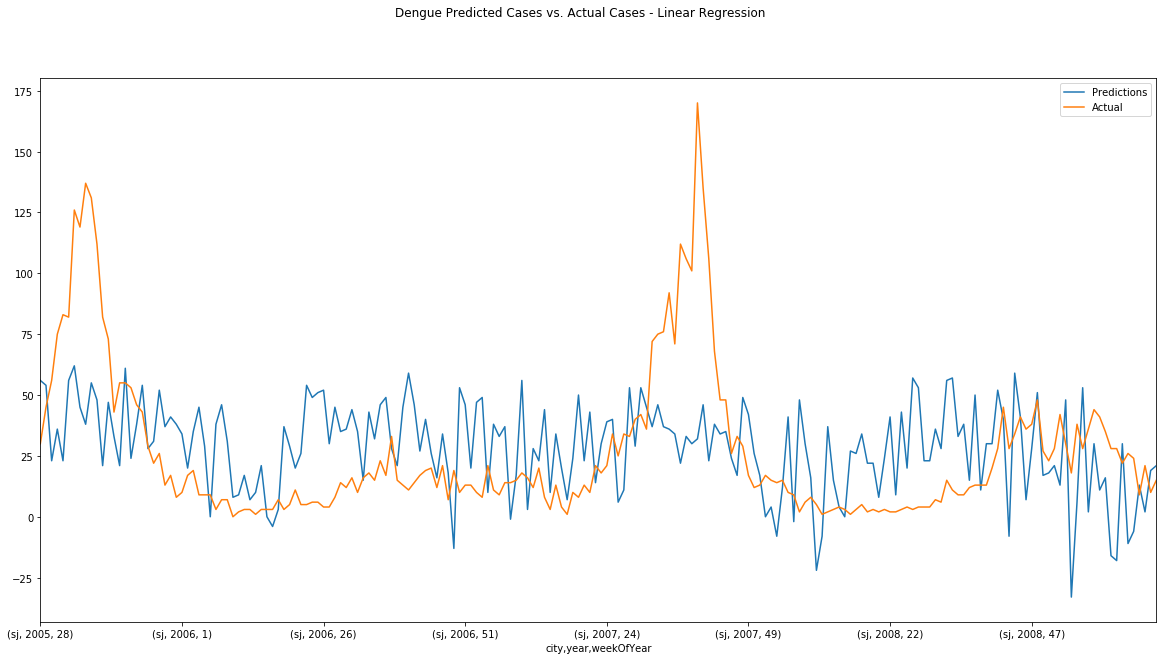

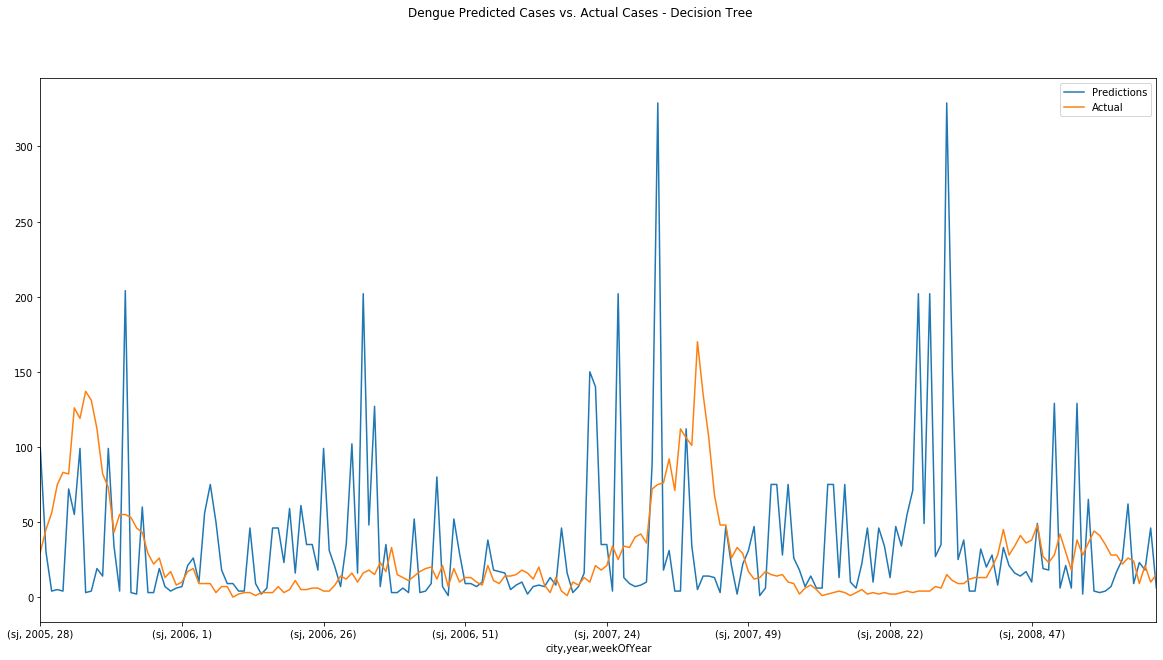

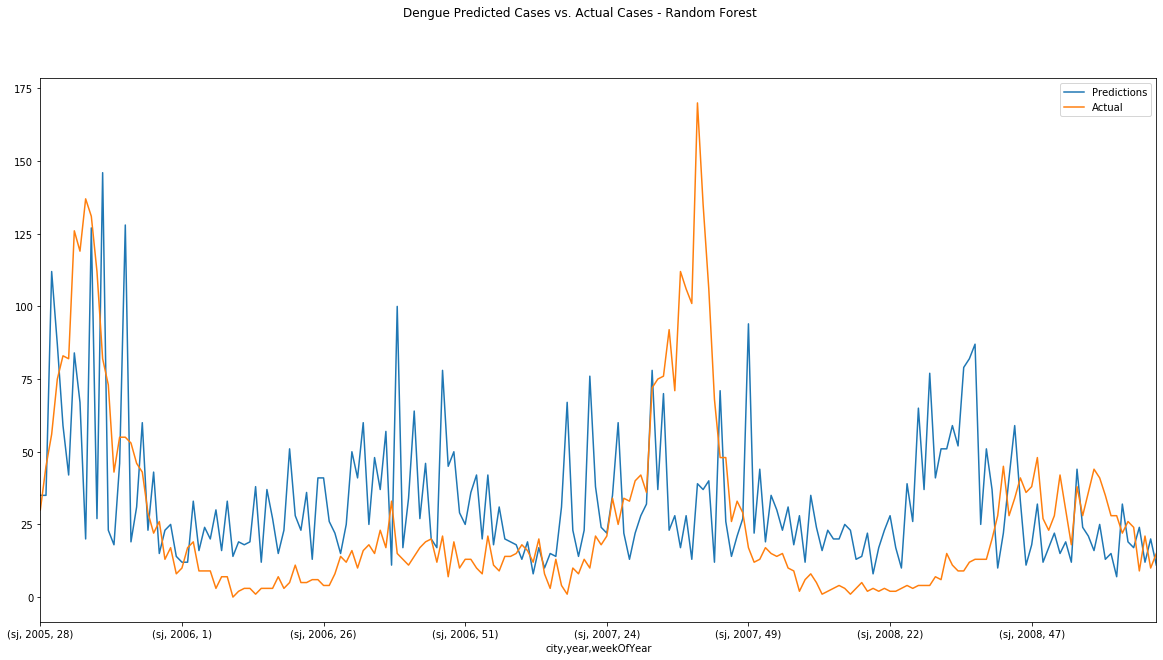

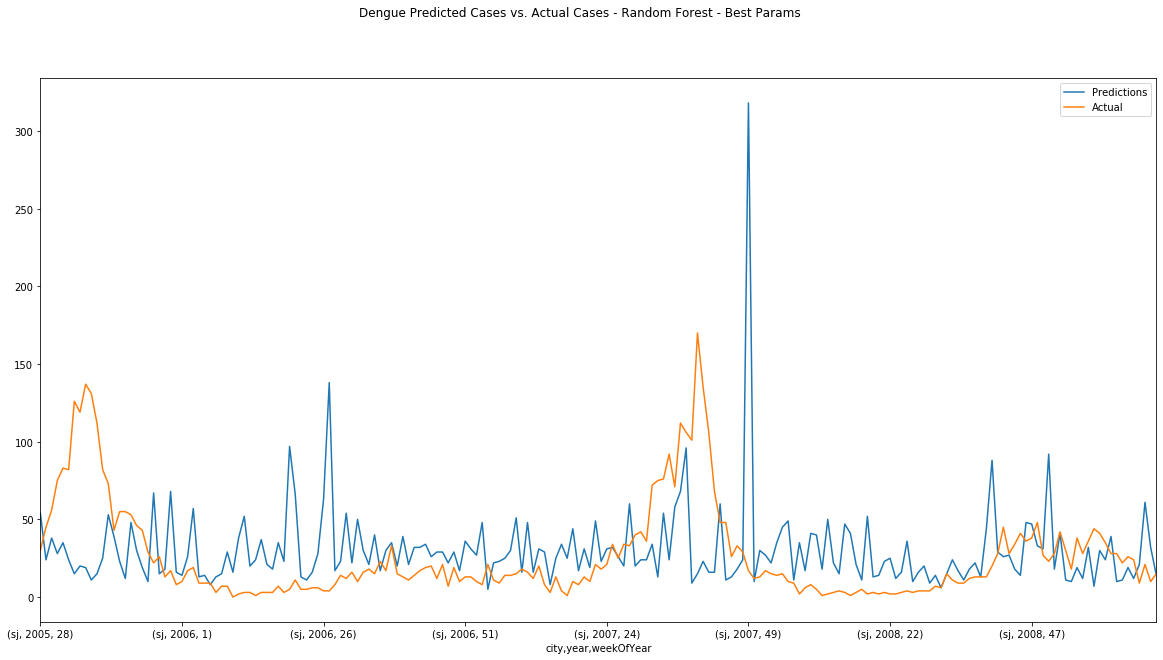

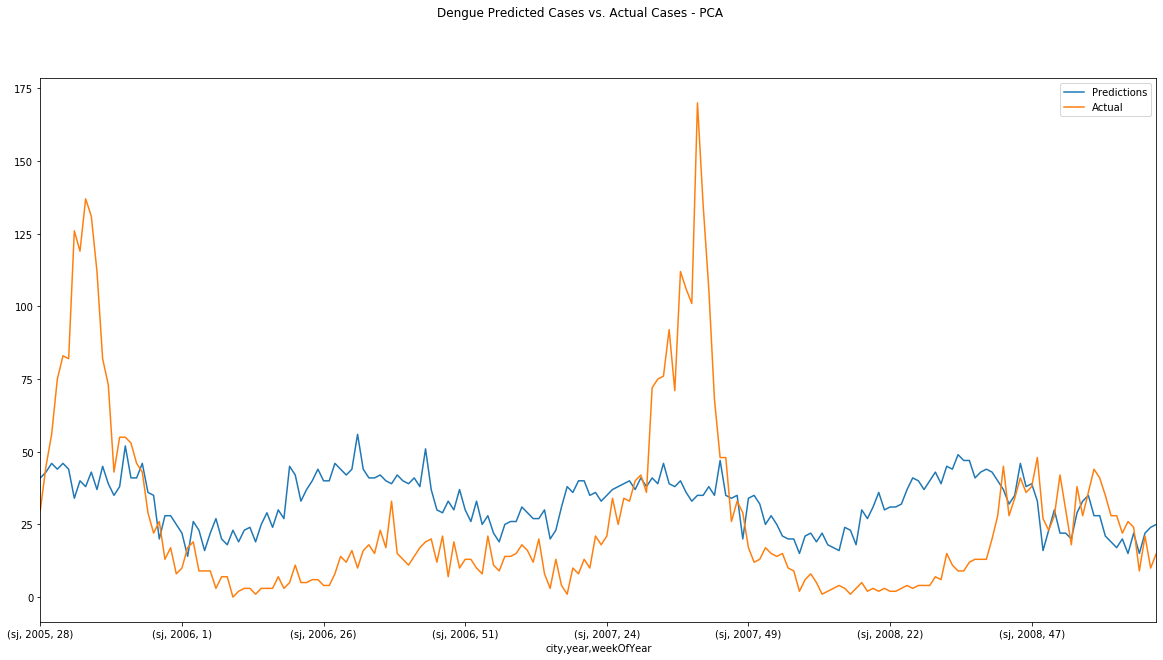

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Linear Regression
lin_reg = LinearRegression()
dfLin = performModelling(lin_reg,'Linear Regression',dfSanJuan, features, labels,0.2,42,10,'sj')
print(dfLin.shape)
display(dfLin.head())

# Decision Tree
tree_reg = DecisionTreeRegressor()
dfTree = performModelling(tree_reg,'Decision Tree',dfSanJuan, features, labels,0.2,42,10,'sj')
print(dfTree.shape)
display(dfTree.head())

# Random Forest
forest_reg = RandomForestRegressor()
dfForestReg = performModelling(forest_reg,'Random Forest',dfSanJuan, features, labels,0.2,42,10,'sj')
print(dfForestReg.shape)
display(dfForestReg.head())

# Random Forest with best parameters
bestFeatures = getRandomForestBestParameters('Random Forest - Best Params',dfSanJuan, features, labels,0.2,42)
#print(bestFeatures)
dfForestRegBest = performModelling(forest_reg,'Random Forest - Best Params',dfSanJuan, bestFeatures, labels,0.2,42,10,'sj')
print(dfForestRegBest.shape)
display(dfForestRegBest.head())

# PCA
# define the pipeline
steps = [('pca', PCA(n_components=0.95)),('m', LinearRegression())]
pcaModel = Pipeline(steps=steps)
dfPCA = performModelling(pcaModel,'PCA',dfSanJuan, features, labels,0.2,42,10,'sj')
print(dfPCA.shape)
display(dfPCA.head())





In [26]:
dfMetrics = pd.concat([dfLin,dfTree,dfForestReg,dfForestRegBest,dfPCA])
dfMetrics.columns=['Model Name','Metrics','value','stdDev']
dfMetrics.sort_values(by=['Metrics','value'],inplace=True)
dfMetrics.reset_index(drop=True,inplace=True)
print(dfMetrics.shape)
display(dfMetrics)

(10, 4)


,Model Name,Metrics,value,stdDev
0,PCA,MSE,87.2259,38.1227
1,Linear Regression,MSE,349.3889,183.9793
2,Random Forest,MSE,639.1883,460.1221
3,Random Forest - Best Params,MSE,1058.1745,1068.1151
4,Decision Tree,MSE,3771.5598,2764.7092
5,PCA,RMSE,9.1020,2.0925
6,Linear Regression,RMSE,18.1871,4.3148
7,Random Forest,RMSE,23.9841,7.9969
8,Random Forest - Best Params,RMSE,29.6821,13.3097
9,Decision Tree,RMSE,56.9017,23.1031


(5, 3)


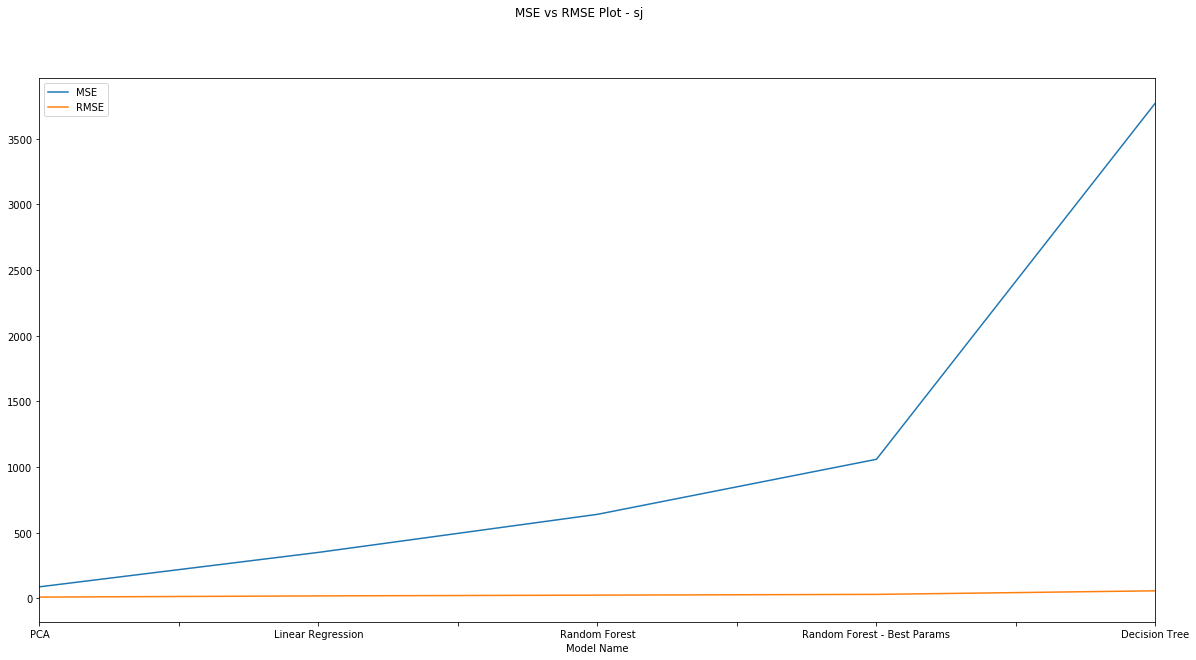

In [27]:

dfMetricsPlot = pd.pivot_table(dfMetrics,values='value',index=['Model Name'],columns=['Metrics']).reset_index()
dfMetricsPlot.sort_values(by=['MSE'],inplace=True)
dfMetricsPlot.reset_index(drop=True,inplace=True)
print(dfMetricsPlot.shape)
dfMetricsPlot.head()

plotMSEvsRMSE(dfMetricsPlot,'sj')

# Based on previous models - below are our observations:
* We started with Linear Regression; We observed features are correlated to each other . In Spite of multi collinearity, we got one of the best model performance with Linear Regression
* PCA certainly the best performing model - as expected (It has eliminated correlation among features and has used only first 2 Principle Components)
* Decision Tree is overfitting (Evident from fitted vs actual Graph) the model and hence the worst performing
* Random Forest has intermediate results. Using Random Forest with Best Features did not improve results significantly. Further Randomization may help.

## Can we do Better Than it?
* If we know Underlying distribution of data, we may be able to model it better


## Distribution of labels

Our target variable, `total_cases` is a non-negative integer, which means we're looking to make some **count predictions**. Standard regression techniques for this type of prediction include

1. Poisson regression
2. Negative binomial regression

Which technique will perform better depends on many things, but the choice between Poisson regression and negative binomial regression is pretty straightforward. 
Poisson regression fits according to the assumption that the mean and variance of the population distribution are equal.
When they aren't, specifically when the variance is much larger than the mean, the negative binomial approach is better. Why? The negative binomial regression simply lifts the assumption that 
the population mean and variance are equal, allowing for a larger class of possible models. In fact, from this perspective, the Poisson distribution is but a special case of 
the negative binomial distribution.

Let's see how our labels are distributed!

(988, 23)


,city,year,weekOfYear,station_max_temp_c,station_avg_temp_c,station_precip_mm,station_min_temp_c,station_diur_temp_rng_c,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,...,reanalysis_specific_humidity_g_per_kg,reanalysis_precip_amt_kg_per_m2,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_avg_temp_k,reanalysis_tdtr_k,ndvi_location_1,ndvi_location_2,ndvi_location_3,ndvi_location_4
0,sj,1990,18,28.8900,25.4400,1.7700,21.9900,6.9000,2.2900,1.7700,...,14.0129,4.5714,299.0571,296.4286,297.7429,2.6286,0.1985,0.1226,0.1776,0.1037
1,sj,1990,19,29.9100,26.7100,3.2600,23.5400,6.3700,1.2300,3.2600,...,15.3729,2.5629,299.6286,297.2571,298.4429,2.3714,0.1624,0.1699,0.1555,0.1422
2,sj,1990,20,29.9700,26.7100,4.9300,23.4900,6.4900,5.9100,4.9300,...,16.8486,3.7286,300.0286,297.7286,298.8786,2.3000,0.1572,0.0323,0.1708,0.1730
3,sj,1990,21,30.8700,27.4700,2.1900,24.1000,6.7700,0.5700,2.1900,...,16.6729,1.9857,300.4429,298.0143,299.2286,2.4286,0.2276,0.1286,0.2359,0.2451
4,sj,1990,22,33.6400,28.9400,1.0700,24.2700,9.3700,0.8300,1.0700,...,17.2100,1.7429,301.1714,298.1571,299.6643,3.0143,0.2512,0.1962,0.2473,0.2622


(988, 4)


,city,year,weekOfYear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


San Juan
mean:  33.42914979757085
var : 2521.4427968448113


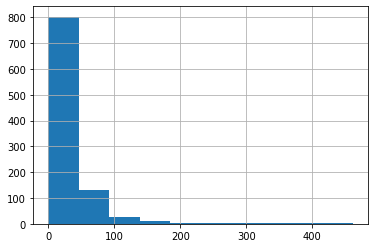

In [28]:
sj_train_features = dfSanJuan[features]
sj_train_labels = dfSanJuan[labels]

print(sj_train_features.shape)
display(sj_train_features.head())


print(sj_train_labels.shape)
display(sj_train_labels.head())

print('San Juan')
print('mean: ', sj_train_labels.total_cases.mean())
print('var :', sj_train_labels.total_cases.var())


sj_train_labels.total_cases.hist()

# We Observe that label var >> mean and hence we will apply negative binomial distribution

# For San Jones - Negative Binomial Distribution is the best performing model and hence its forecast is being Persisted

790
(790, 8)
(198, 8)
best alpha =  1e-08
best score =  21.954545454545453


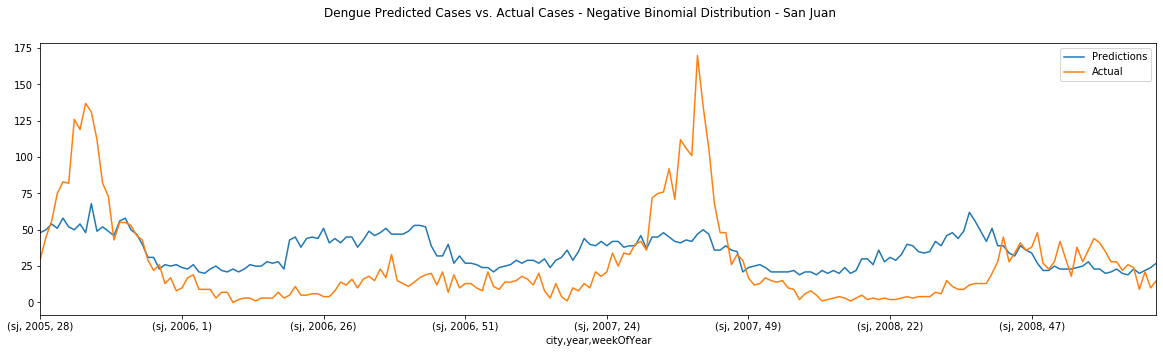

In [29]:
sj_train =dfSanJuan[targetFeatures]
splitPoint = int(dfSanJuan.shape[0]*0.8)
print(splitPoint)
sj_train = sj_train.sort_values(by=['city', 'year', 'weekOfYear']).reset_index(drop=True)
train_set, test_set = sj_train.head(splitPoint),sj_train.tail(sj_train.shape[0]-splitPoint)

print(train_set.shape)
print(test_set.shape)

sj_best_model,bestScore = get_best_model(train_set,test_set)
predictions = sj_best_model.predict(test_set).astype(int)
test_set['fitted'] = predictions
test_set = test_set.set_index(['city', 'year', 'weekOfYear']).sort_index()


figs, axes = plt.subplots(figsize=(20,5))
test_set.fitted.plot(ax=axes, label="Predictions")
test_set.total_cases.plot(ax=axes, label="Actual")
plt.suptitle("Dengue Predicted Cases vs. Actual Cases - Negative Binomial Distribution - San Juan")
plt.legend()

plt.savefig("plots/NegativeBinomial_sj.png")

targetPrediction = test_set[['fitted']].rename(columns={'fitted':'total_cases'})
targetPrediction =targetPrediction.reset_index()
targetPrediction.to_csv("output/SanJuanPredictions_NegativeBinomial.csv",index=False)

,Model Name,MSE,RMSE
0,Negative Binomial Distribution,21.9545,4.6856


(6, 3)


Metrics,Model Name,MSE,RMSE
0,Negative Binomial Distribution,21.9545,4.6856
1,PCA,87.2259,9.1020
2,Linear Regression,349.3889,18.1871
3,Random Forest,639.1883,23.9841
4,Random Forest - Best Params,1058.1745,29.6821
5,Decision Tree,3771.5598,56.9017


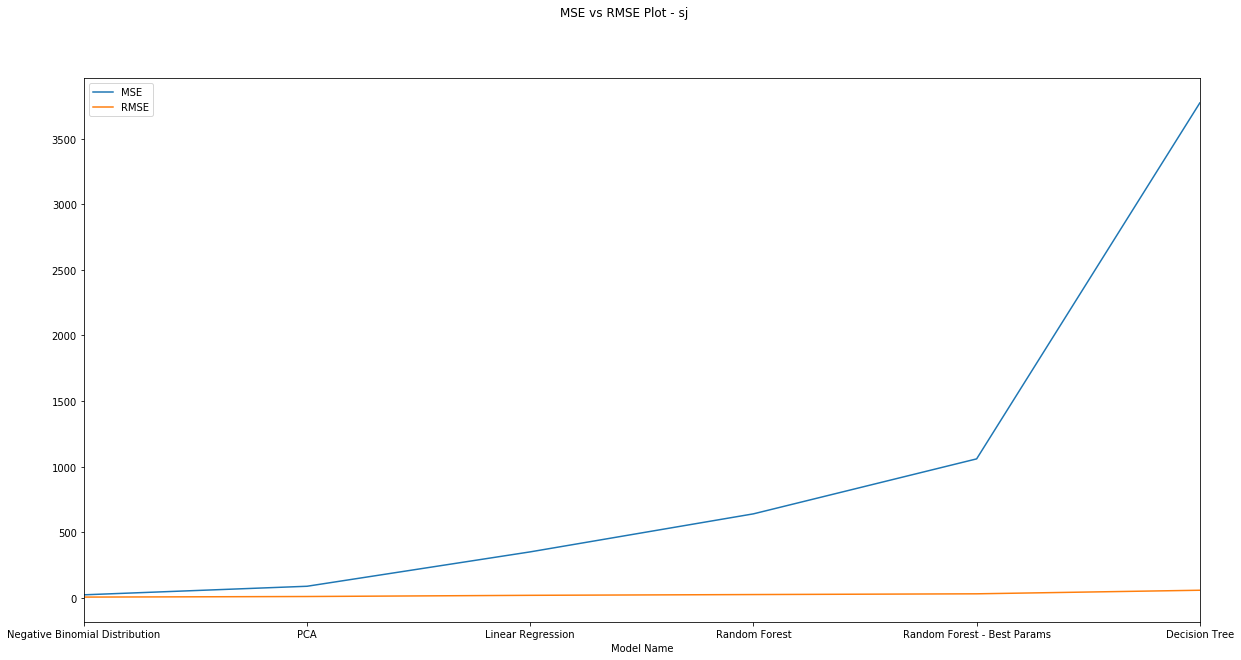

In [30]:
import math
dfBinomial = pd.DataFrame([['Negative Binomial Distribution',round(bestScore,4),round(math.sqrt(bestScore),4)]] ,columns=['Model Name','MSE','RMSE'])
display(dfBinomial.head())


dfMetricsPlot = pd.concat([dfMetricsPlot,dfBinomial])
dfMetricsPlot.sort_values(by=['MSE'],inplace=True)
dfMetricsPlot.reset_index(drop=True,inplace=True)
print(dfMetricsPlot.shape)
display(dfMetricsPlot.head(10))

plotMSEvsRMSE(dfMetricsPlot,'sj')

# Select and Train Models - Iquitos

374
(374, 20) (374, 1) (94, 20) (94, 1)
-----------------------------------------------Linear Regression-----------------------------------------------
Neg MSE - Scores: [ -4.3692027  -10.80664825  -7.04868258  -3.83566156  -8.01936605
  -4.65397756 -17.37983624  -3.26444809  -9.51996123  -5.02243952]
Neg MSE - Mean: -7.392022377997771
Neg MSE - Standard deviation: 4.103528781866127
-----------------------------------------------------------------------------------------------
RMSE - Scores: [2.09026379 3.28734669 2.65493551 1.95848451 2.83184852 2.15730794
 4.16891308 1.80677837 3.08544344 2.24107999]
RMSE - Mean: 2.62824018399132
RMSE - Standard deviation: 0.6959712014523615
(2, 4)


,0,1,2,3
0,Linear Regression,MSE,7.3920,4.1035
1,Linear Regression,RMSE,2.6282,0.6960


374
(374, 20) (374, 1) (94, 20) (94, 1)
-----------------------------------------------Decision Tree-----------------------------------------------
Neg MSE - Scores: [  -38.8359375    -80.72777778  -188.0000625    -17.52882653
   -10.24922052  -606.14902778 -1522.43716049 -1218.38373457
   -85.60235969   -35.90002023]
Neg MSE - Mean: -380.3814127589513
Neg MSE - Standard deviation: 526.8005688899557
-----------------------------------------------------------------------------------------------
RMSE - Scores: [ 6.23184864  8.98486382 13.71131148  4.18674414  3.20144038 24.62009398
 39.01842078 34.90535395  9.25215433  5.99166256]
RMSE - Mean: 15.01038940716455
RMSE - Standard deviation: 12.452695395143719
(2, 4)


,0,1,2,3
0,Decision Tree,MSE,380.3814,526.8006
1,Decision Tree,RMSE,15.0104,12.4527


374
(374, 20) (374, 1) (94, 20) (94, 1)
-----------------------------------------------Random Forest-----------------------------------------------
Neg MSE - Scores: [ -76.85150044  -25.35612948 -136.81173552  -21.66625528  -26.39184361
 -115.38793546 -304.696619   -329.20588806 -272.13753383  -18.63562625]
Neg MSE - Mean: -132.71410669195942
Neg MSE - Standard deviation: 117.99966024009605
-----------------------------------------------------------------------------------------------
RMSE - Scores: [ 8.76649876  5.03548702 11.69665489  4.65470249  5.13729925 10.74187765
 17.45556126 18.14403175 16.49659158  4.31690007]
RMSE - Mean: 10.24456047172908
RMSE - Standard deviation: 5.269068934170955
(2, 4)


,0,1,2,3
0,Random Forest,MSE,132.7141,117.9997
1,Random Forest,RMSE,10.2446,5.2691


374
(374, 20) (374, 1) (94, 20) (94, 1)
Best Parameters for Random Forest are --> {'max_features': 2, 'n_estimators': 30}
****************************feature_importances****************************
[(0.06718578391867773, 'reanalysis_relative_humidity_percent'), (0.06692856795222307, 'ndvi_location_4'), (0.06173586568340132, 'station_max_temp_c'), (0.059563358349820496, 'station_diur_temp_rng_c'), (0.05888969003078431, 'reanalysis_max_air_temp_k'), (0.05190863804433889, 'reanalysis_avg_temp_k'), (0.05181662543916787, 'station_min_temp_c'), (0.051782640748975976, 'reanalysis_min_air_temp_k'), (0.05142154876347972, 'reanalysis_specific_humidity_g_per_kg'), (0.05074321655848643, 'reanalysis_tdtr_k'), (0.050099189919212014, 'reanalysis_dew_point_temp_k'), (0.04991436881879153, 'ndvi_location_2'), (0.04975076855673861, 'reanalysis_precip_amt_kg_per_m2'), (0.045184565029270235, 'precipitation_amt_mm'), (0.044913032889247174, 'ndvi_location_1'), (0.044887820091728176, 'ndvi_location_3'), (0.04

,0,1,2,3
0,Random Forest - Best Params,MSE,62.1000,63.8427
1,Random Forest - Best Params,RMSE,6.9653,3.6858


374
(374, 20) (374, 1) (94, 20) (94, 1)
-----------------------------------------------PCA-----------------------------------------------
Neg MSE - Scores: [-2.22429605 -1.44819798 -1.17498603 -0.56642395 -0.41103209 -3.10489137
 -0.24181712 -0.94189706 -0.63841205 -0.37413136]
Neg MSE - Mean: -1.1126085068968723
Neg MSE - Standard deviation: 0.8757687641547977
-----------------------------------------------------------------------------------------------
RMSE - Scores: [1.49140741 1.20341098 1.08396773 0.75261142 0.64111785 1.76207019
 0.49174905 0.97051381 0.79900692 0.61166278]
RMSE - Mean: 0.9807518126594633
RMSE - Standard deviation: 0.38824526894998945
(2, 4)


,0,1,2,3
0,PCA,MSE,1.1126,0.8758
1,PCA,RMSE,0.9808,0.3882


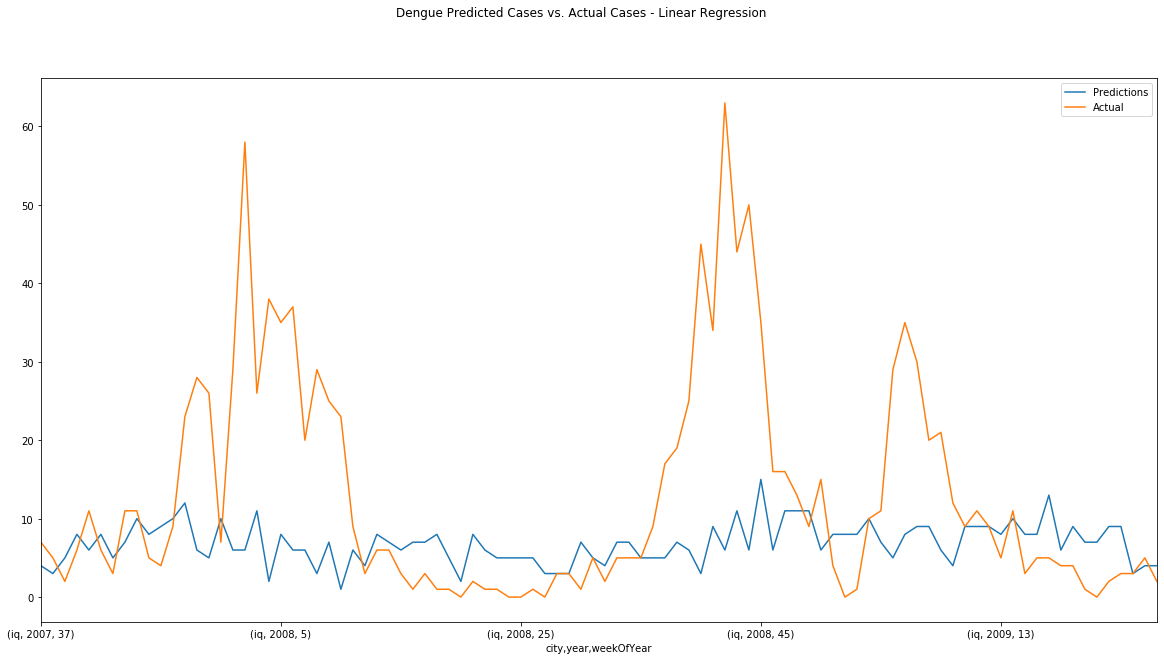

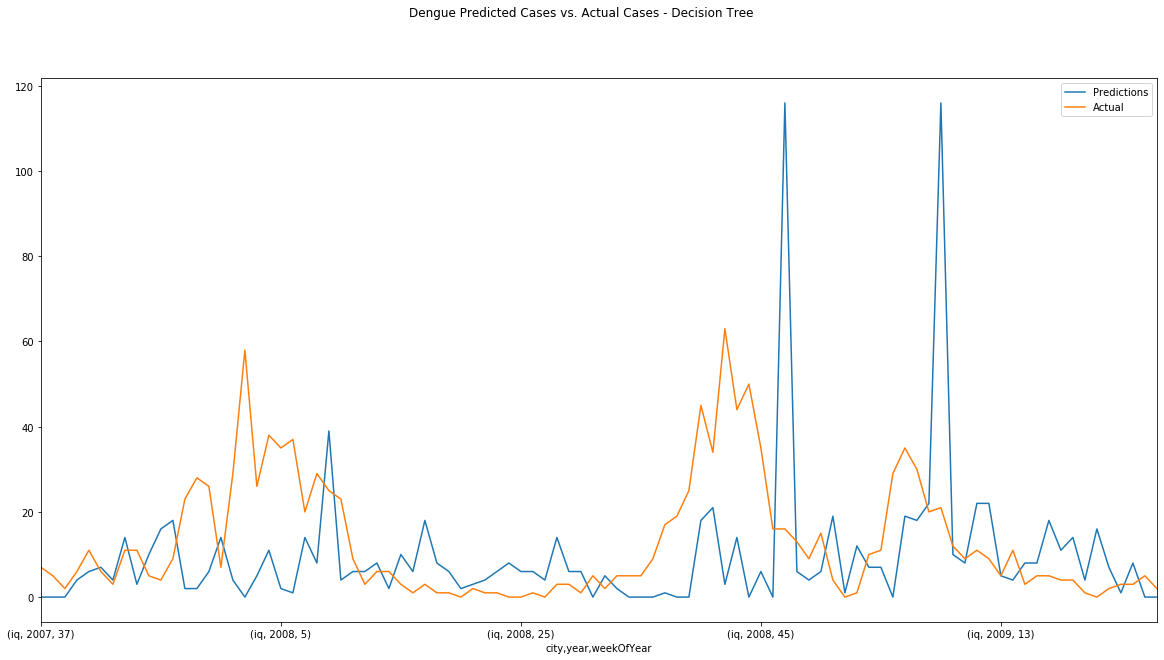

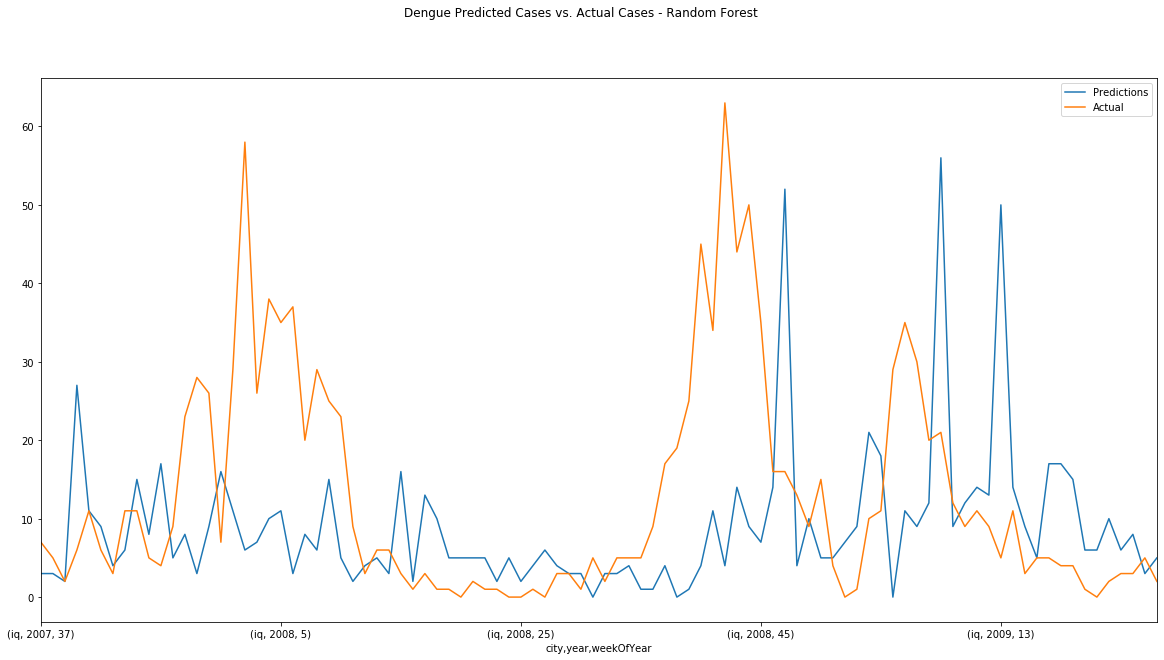

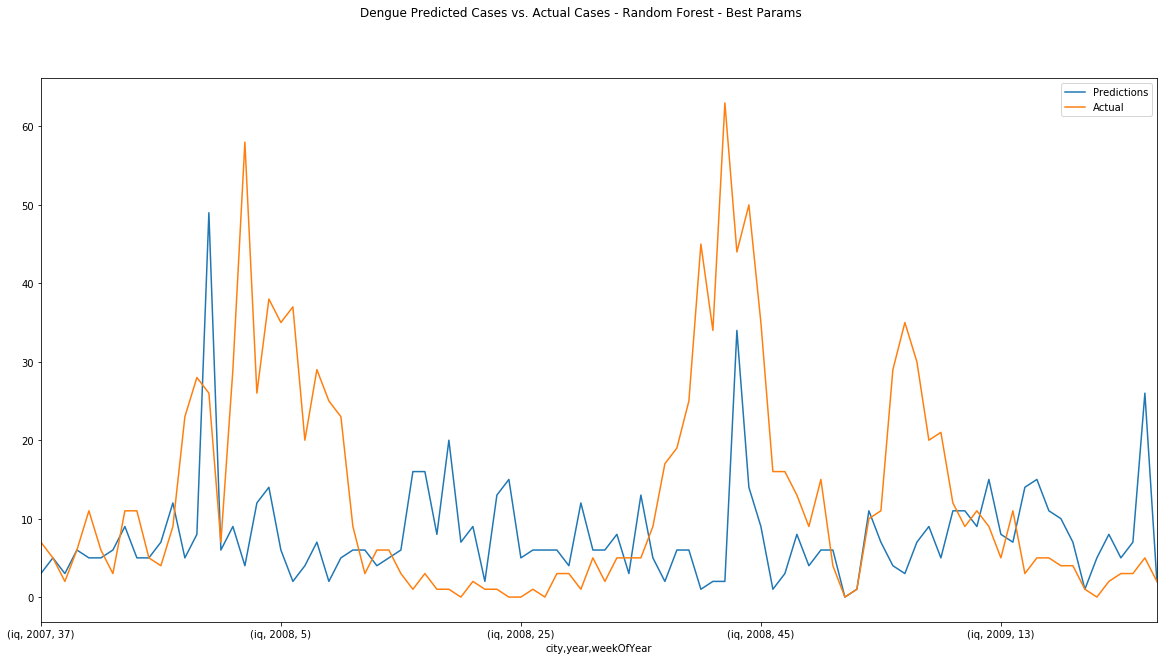

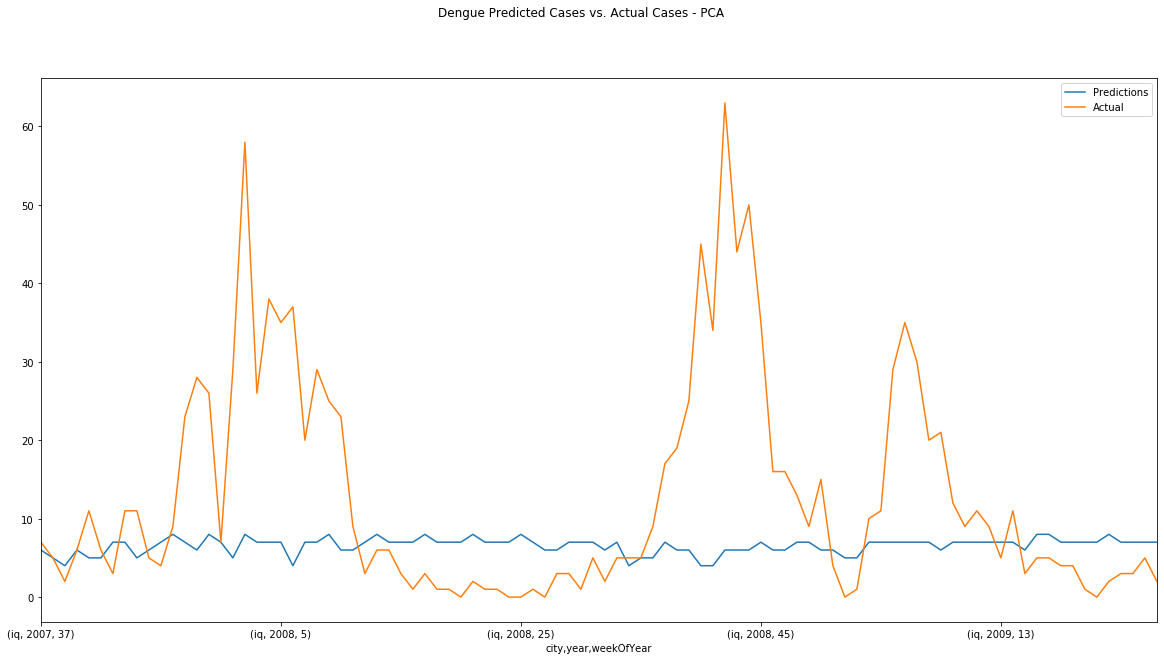

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Linear Regression
lin_reg = LinearRegression()
dfLin = performModelling(lin_reg,'Linear Regression',dfIquitos, features, labels,0.2,42,10,'iq')
print(dfLin.shape)
display(dfLin.head())

# Decision Tree
tree_reg = DecisionTreeRegressor()
dfTree = performModelling(tree_reg,'Decision Tree',dfIquitos, features, labels,0.2,42,10,'iq')
print(dfTree.shape)
display(dfTree.head())

# Random Forest
forest_reg = RandomForestRegressor()
dfForestReg = performModelling(forest_reg,'Random Forest',dfIquitos, features, labels,0.2,42,10,'iq')
print(dfForestReg.shape)
display(dfForestReg.head())

# Random Forest with best parameters
bestFeatures = getRandomForestBestParameters('Random Forest - Best Params',dfIquitos, features, labels,0.2,42)
#print(bestFeatures)
dfForestRegBest = performModelling(forest_reg,'Random Forest - Best Params',dfIquitos, bestFeatures, labels,0.2,42,10,'iq')
print(dfForestRegBest.shape)
display(dfForestRegBest.head())

# PCA
# define the pipeline
steps = [('pca', PCA(n_components=0.95)), ('m', LinearRegression())]
pcaModel = Pipeline(steps=steps)
dfPCA = performModelling(pcaModel,'PCA',dfIquitos, features, labels,0.2,42,10,'iq')
print(dfPCA.shape)
display(dfPCA.head())





In [32]:
dfMetrics = pd.concat([dfLin,dfTree,dfForestReg,dfForestRegBest,dfPCA])
dfMetrics.columns=['Model Name','Metrics','value','stdDev']
dfMetrics.sort_values(by=['Metrics','value'],inplace=True)
dfMetrics.reset_index(drop=True,inplace=True)
print(dfMetrics.shape)
display(dfMetrics)

(10, 4)


,Model Name,Metrics,value,stdDev
0,PCA,MSE,1.1126,0.8758
1,Linear Regression,MSE,7.3920,4.1035
2,Random Forest - Best Params,MSE,62.1000,63.8427
3,Random Forest,MSE,132.7141,117.9997
4,Decision Tree,MSE,380.3814,526.8006
5,PCA,RMSE,0.9808,0.3882
6,Linear Regression,RMSE,2.6282,0.6960
7,Random Forest - Best Params,RMSE,6.9653,3.6858
8,Random Forest,RMSE,10.2446,5.2691
9,Decision Tree,RMSE,15.0104,12.4527


(5, 3)


Metrics,Model Name,MSE,RMSE
0,PCA,1.1126,0.9808
1,Linear Regression,7.3920,2.6282
2,Random Forest - Best Params,62.1000,6.9653
3,Random Forest,132.7141,10.2446
4,Decision Tree,380.3814,15.0104


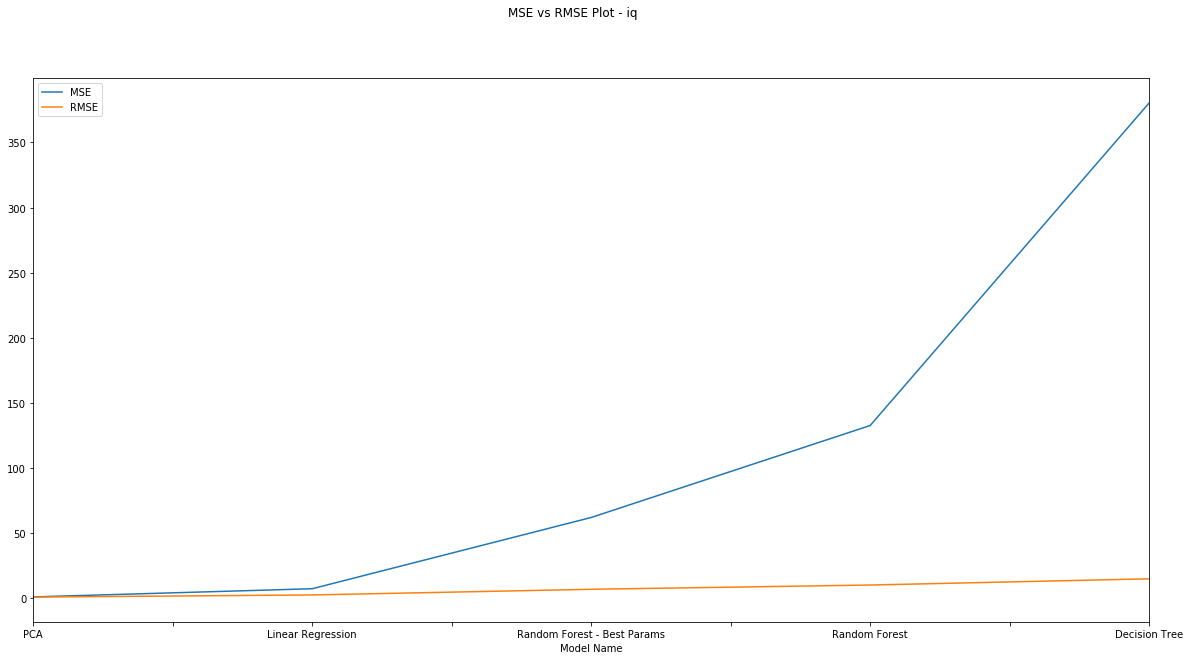

In [33]:

dfMetricsPlot = pd.pivot_table(dfMetrics,values='value',index=['Model Name'],columns=['Metrics']).reset_index()
dfMetricsPlot.sort_values(by=['MSE'],inplace=True)
dfMetricsPlot.reset_index(drop=True,inplace=True)
print(dfMetricsPlot.shape)
display(dfMetricsPlot.head())

plotMSEvsRMSE(dfMetricsPlot,'iq')

## Can we do Better Than it? We will apply Negative Binomial Distribution - as we had applied for San Juan

(468, 23)


,city,year,weekOfYear,station_max_temp_c,station_avg_temp_c,station_precip_mm,station_min_temp_c,station_diur_temp_rng_c,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,...,reanalysis_specific_humidity_g_per_kg,reanalysis_precip_amt_kg_per_m2,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_avg_temp_k,reanalysis_tdtr_k,ndvi_location_1,ndvi_location_2,ndvi_location_3,ndvi_location_4
0,iq,2000,26,31.6000,26.3400,3.6300,21.0300,10.5100,0.4300,3.6300,...,16.6514,6.1700,302.9143,293.9857,298.4500,8.9286,0.1929,0.2472,0.1323,0.3409
1,iq,2000,27,33.0700,26.9100,8.6600,20.9000,11.9100,12.2300,8.6600,...,16.8629,6.5714,303.5857,293.2714,298.4286,10.3143,0.2168,0.2417,0.2761,0.2895
2,iq,2000,28,31.0000,26.7400,7.9300,20.9700,11.4400,1.3000,7.9300,...,17.1200,9.2529,301.0857,293.7000,297.3929,7.3857,0.1768,0.1280,0.1731,0.2041
3,iq,2000,29,27.5800,25.0200,0.8000,18.2300,12.5500,4.8300,0.8000,...,14.4314,3.4229,300.7857,291.6714,296.2286,9.1143,0.2277,0.2003,0.1454,0.2542
4,iq,2000,30,31.6100,25.9700,8.9700,20.3400,11.2700,1.4400,8.9700,...,15.4443,4.5429,302.3857,292.8857,297.6357,9.5000,0.3286,0.3610,0.3221,0.2544


(468, 4)


,city,year,weekOfYear,total_cases
0,iq,2000,26,0
1,iq,2000,27,0
2,iq,2000,28,0
3,iq,2000,29,0
4,iq,2000,30,0


Iquitos
mean:  7.773504273504273
var : 125.66165193360047


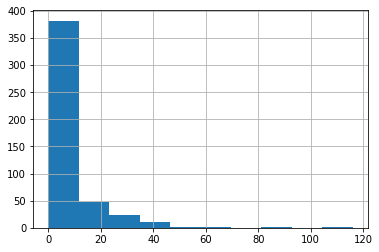

In [34]:
iq_train_features = dfIquitos[features]
iq_train_labels = dfIquitos[labels]

print(iq_train_features.shape)
display(iq_train_features.head())


print(iq_train_labels.shape)
display(iq_train_labels.head())

print('Iquitos')
print('mean: ', iq_train_labels.total_cases.mean())
print('var :', iq_train_labels.total_cases.var())


iq_train_labels.total_cases.hist()

# We Observe that label var >> mean and hence we will apply negative binomial distribution

374
(374, 8)
(94, 8)
best alpha =  1e-08
best score =  9.25531914893617


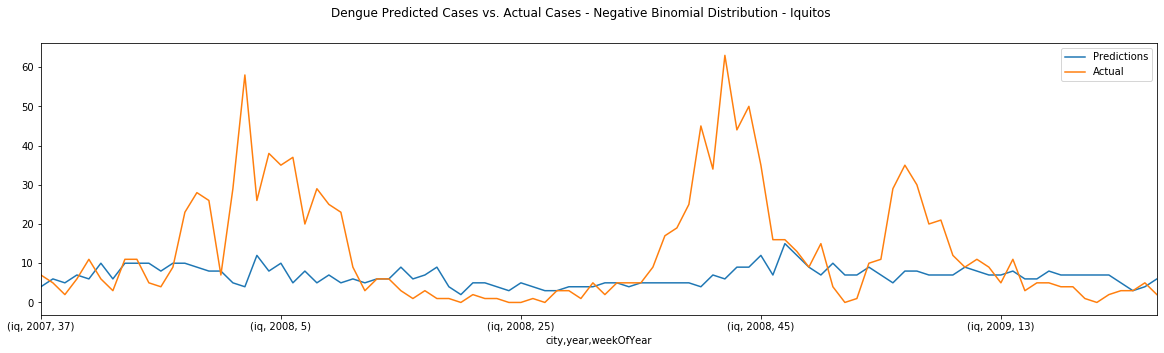

In [35]:
iq_train =dfIquitos[targetFeatures]


splitPoint = int(dfIquitos.shape[0]*0.8)
print(splitPoint)
iq_train = iq_train.sort_values(by=['city', 'year', 'weekOfYear']).reset_index(drop=True)
train_set, test_set = iq_train.head(splitPoint),iq_train.tail(iq_train.shape[0]-splitPoint)

print(train_set.shape)
print(test_set.shape)

iq_best_model,bestScore = get_best_model(train_set,test_set)
predictions = iq_best_model.predict(test_set).astype(int)
test_set['fitted'] = predictions
test_set = test_set.set_index(['city', 'year', 'weekOfYear']).sort_index()

figs, axes = plt.subplots(figsize=(20,5))
test_set.fitted.plot(ax=axes, label="Predictions")
test_set.total_cases.plot(ax=axes, label="Actual")
plt.suptitle("Dengue Predicted Cases vs. Actual Cases - Negative Binomial Distribution - Iquitos")
plt.legend()


plt.savefig("plots/NegativeBinomial_iq.png")

,Model Name,MSE,RMSE
0,Negative Binomial Distribution,9.2553,3.0423


(6, 3)


Metrics,Model Name,MSE,RMSE
0,PCA,1.1126,0.9808
1,Linear Regression,7.3920,2.6282
2,Negative Binomial Distribution,9.2553,3.0423
3,Random Forest - Best Params,62.1000,6.9653
4,Random Forest,132.7141,10.2446
5,Decision Tree,380.3814,15.0104


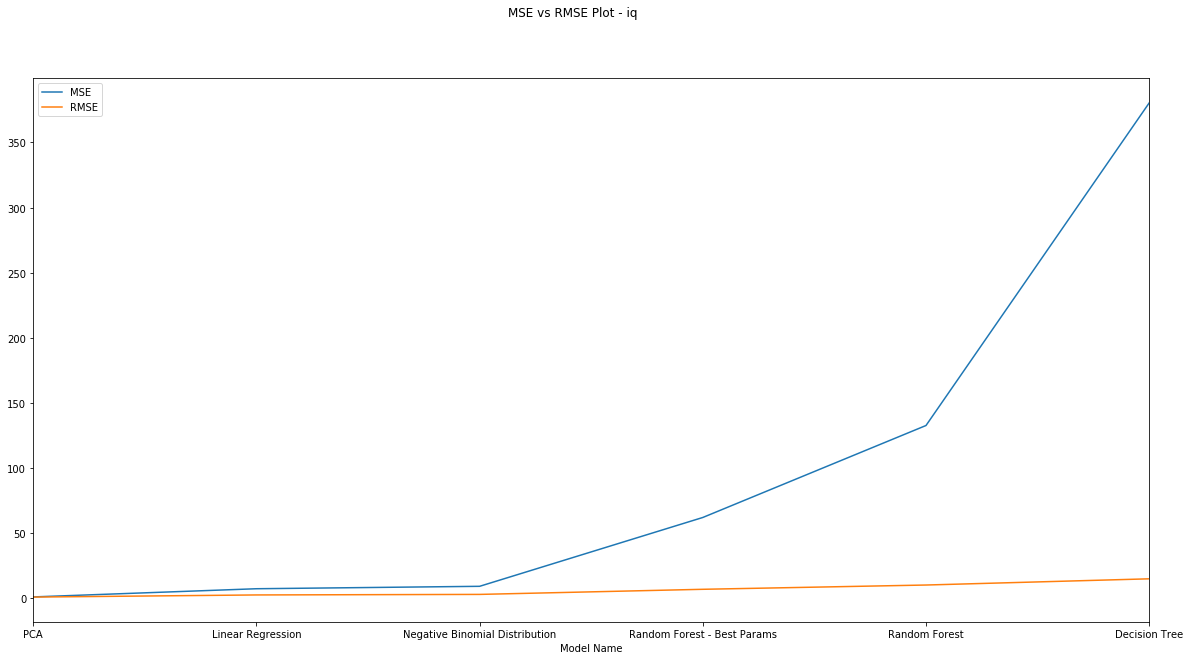

In [36]:
import math
dfBinomial = pd.DataFrame([['Negative Binomial Distribution',round(bestScore,4),round(math.sqrt(bestScore),4)]] ,columns=['Model Name','MSE','RMSE'])
display(dfBinomial.head())


dfMetricsPlot = pd.concat([dfMetricsPlot,dfBinomial])
dfMetricsPlot.sort_values(by=['MSE'],inplace=True)
dfMetricsPlot.reset_index(drop=True,inplace=True)
print(dfMetricsPlot.shape)
display(dfMetricsPlot.head(10))

plotMSEvsRMSE(dfMetricsPlot,'iq')

# For Iquitos - PCA is the best performing model
* As we have observed - fitted vs actual graph of Negative Binomial distribution - It is fitting worse than PCA

In [37]:

X_train,X_test,Y_train,Y_test = getTrainandTestDataSets(dfIquitos, features, labels,0.2,42)
pcaModel.fit(X_train, X_test)
Y_pred = pcaModel.predict(Y_train).astype(int)
print(Y_pred.shape)

display(Y_test.shape)

Y_test['fitted'] = Y_pred

display(Y_test.head())

targetPrediction = Y_test[['fitted']].rename(columns={'fitted':'total_cases'})
print(targetPrediction.shape)
display(targetPrediction.head())
targetPrediction =targetPrediction.reset_index()
targetPrediction.to_csv("output/IquitosPredictions_PCA.csv",index=False)

374
(374, 20) (374, 1) (94, 20) (94, 1)
(94, 1)


(94, 1)

total_cases  fitted
city year weekOfYear                     
iq   2007 37                    7       6
          38                    5       5
          39                    2       4
          40                    6       6
          41                   11       5

(94, 1)


total_cases
city year weekOfYear             
iq   2007 37                    6
          38                    5
          39                    4
          40                    6
          41                    5

## Final Observations
* Negative Binomial Distribution is the best performing model for San Juan and hence it is being proposed
* PCA is the best performing model for Iquitos and hence it is being proposed
## Further improvements
* This is a time Series model and there is trend in total_cases. We should try exponential smoothing model to explore futher performance improvement

## Reflecting on our performance

* We see that our model in blue does track the seasonality of Dengue cases. However, the timing of the seasonality of our predictions has a mismatch with the actual results. 
One potential reason for this is that our features don't look far enough into the past--that is to say, we are asking to predict cases at the same time as we are measuring precipitation. 
Because dengue is mosquito born, and the mosquito lifecycle depends on water, we need to take both the life of a mosquito and the time between infection and symptoms into account when modeling dengue. This is a critical avenue to explore when improving this model.

* The other important error is that our predictions are relatively consistent--we miss the spikes that are large outbreaks. 
One reason is that we don't take into account the contagiousness of dengue. A possible way to account for this is to build a model that progressively predicts a new value while taking into account 
the previous prediction. By training on the dengue outbreaks and then using the predicted number of patients in the week before, we can start to model this time dependence that the 
current model misses.

